# LGT1 Unit07 Day1 - In-Class Assignment: Scikit-Learn

### <p style="text-align: right;"> &#9989; Put your name here.</p>


#### <p style="text-align: right;"> &#9989; Put your group member names here.</p>

-------------

## Goals of this assignment

The goals of this assignment are:

* Use Scikit-Learn for linear regression and polynomial features
* Learn about kernel methods and how to fit hyperparameters in Scikit-Learn

## Assignment instructions


Upload the assignment to Gradescope before 5PM today.

# Part 1 :  Scikit-Learn with Linear Models

[Scikit-Learn](https://scikit-learn.org/) (sklearn) is the most popular library for "conventional" (e.g., non-deep-learning) machine learning.
The library has an impressive collection of machine-learning algorithms and the tools needed to use them effectively in many applications, such as tools for model validation.
It provides many unsupervised and supervised learning algorithms, and is built on the technology we've already been using, like NumPy, Pandas, and Matplotlib.

In [ ]:
# modules we will be using here
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
import os

# fix random seed
np.random.seed(12)

# number of data points
n_points = 32

## 1.1 Our old friend: linear regression
All machine-learning models and many utility tools in `sklearn` follow the pattern defined by `LinearRegression`.

### 1.1.1 Create a linear regression with the desired settings

We begin by configuring a `LinearRegression`, a Python object that can be created with different settings.
We can examine the object's `__dict__` member to see the settings stored in the object.

In [ ]:
lr = LinearRegression()
lr.__dict__

{'fit_intercept': True, 'copy_X': True, 'n_jobs': None, 'positive': False}

We can set these when we create the object, and the `help` function for the `__init__` member tells us what the options are and their default values.

In [ ]:
help(LinearRegression.__init__)

Help on function __init__ in module sklearn.linear_model._base:

__init__(self, *, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
    Initialize self.  See help(type(self)) for accurate signature.



You can retrieve or set these options manually using the `.` operator.

In [ ]:
lr.fit_intercept

True

In [ ]:
lr.fit_intercept = False
lr.fit_intercept

False

This object also has `get_params` and `set_params` methods defined for manipulating these members.

In [ ]:
lr.get_params()

{'copy_X': True, 'fit_intercept': False, 'n_jobs': None, 'positive': False}

In [ ]:
lr.set_params(fit_intercept=True)

LinearRegression()

These parameters provide you different ways of
- changing how a machine-learning model learns (e.g., `fit_intercept` controls whether we determine a nonzero intercept for the model)
- changing computational methodology (e.g., whether it uses more than one parallel job when evaluating the model)
- altering other details (e.g., printing debugging information)

The other kind of information held by this object is the information learned from data.

### 1.1.2 Fitting a model
Once you define the proper settings, the next step is to use a model object to learn from data.

We'll use a simple example with some linear data.

In [ ]:
X = np.random.uniform(0, 10, (n_points, 1))  # 2D array with one column
y = 2 * X + 1 + np.random.normal(size=(n_points, 1))

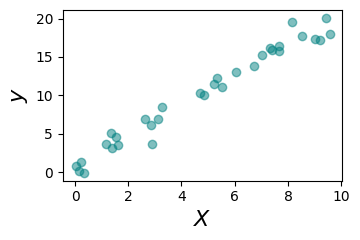

In [ ]:
# Check out the data visually to avoid wasting a lot of time
# training on data that doesn't make any sense
fig, ax = plt.subplots(figsize=(3.7, 2.5))

x_plot = np.linspace(0, 10, 128)[:, None]  # Makes a 2D array
ax.scatter(X, y, color='teal', alpha=0.5)

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)

fig.tight_layout()

All machine-learning models in `sklearn` provide a `fit` operation that runs the machine-learning algorithm to learn the weights of the model for the data.

In [ ]:
lr.fit(X, y)  # For supervised learning, it takes the inputs and outputs

LinearRegression()

The information extracted from the model is stored in the object.
For example, the model coefficients are stored in `coef_`.
Note how the model coefficients are close to 2, the slope we input to our model.

In [ ]:
lr.coef_

array([[1.98442781]])

Now that our model contains the weights needed to make predictions, we can use the `predict` function on new data.

In [ ]:
x_eval = np.linspace(0, 10, n_points)[:, None]
# [:, None] turns the array from a 1D shape (32,) to a 2D shape (32, 1).
#  sklearn requires input arrays be 2D

In [ ]:
y_pred = lr.predict(x_eval)

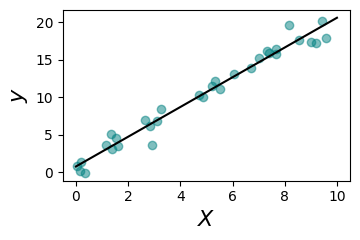

In [ ]:
fig, ax = plt.subplots(figsize=(3.7, 2.5))

ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_eval, y_pred, 'k')

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)

fig.tight_layout()

Awesome! You've now fit your first machine-learning model.

### 1.1.3: Write some code
Fit a model without `fit_intercept=False` and make predictions using `x_eval`.
Name that model `lr_2` and the predictions `y_pred_2`.

In [ ]:
###  your code here


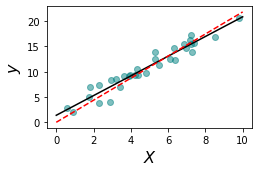

In [ ]:
fig, ax = plt.subplots(figsize=(3.7, 2.5))

ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_eval, y_pred, 'k', label='intercept')
ax.plot(x_eval, y_pred_2, 'r--', label='no intercept')

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)

fig.tight_layout()

The following block will raise an error if you've made a mistake

In [ ]:
assert lr_2.intercept_ == 0

## 1.2: Measuring performance
The next critical element of using `sklearn` is to measure the performance of different models.

There are many ways to measure model performance, and we can try out some of them using the capabilities of the `sklearn.metrics` module.

In [ ]:
from sklearn import metrics

As an example, we'll compute the mean absolute error for the two-parameter and one-parameter linear models.

In [ ]:
lr_mae = metrics.mean_absolute_error(lr.predict(X), y)
lr_2_mae = metrics.mean_absolute_error(lr_2.predict(X), y)
print(f'With intercept: MAE={lr_mae:.1f} ; Without intercept: MAE={lr_2_mae:.1f}')

With intercept: MAE=0.9 ; Without intercept: MAE=1.1


### 1.2.1: Mean square error
Compare the "mean squared error" between the two models, using variable `lr_mse` and `lr_2_mse`

In [ ]:
### your code here


In [ ]:
#raise NotImplementedError()
print(f'With intercept: MSE={lr_mse:.1f} ; Without intercept: MAE={lr_2_mse:.1f}')

### 1.3.1 Polynomial features
To start, we'll create a quadratic dataset.

In [ ]:
y = -0.6 * X * (X - 11) + np.random.normal(size=(n_points, 1))

Now, let's take a linear regression on it.

In [ ]:
lr = LinearRegression().fit(X, y)

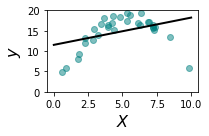

In [ ]:
fig, ax = plt.subplots(figsize=(3, 2))

x_plot = np.linspace(0, 10, 128)[:, None]  # Makes a 2D array
ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_plot, lr.predict(x_plot), 'k', lw=2)

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_ylim(0, 20)

fig.tight_layout()

Not that linear model is terrible.
Let's add some polynomial features (e.g., $X^2$, $X^3$) to make it possible to learn a nonlinear model.

We'll use the [`PolynomialFeatures`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) tool from `sklearn` to compute these features.
It's descended from the same kind of base object as `LinearRegression` (it's a `BaseEstimator`), so it has the same functions for changing its settings

In [ ]:
pf = PolynomialFeatures(degree=3, include_bias=False)
pf.get_params()

{'degree': 3, 'include_bias': False, 'interaction_only': False, 'order': 'C'}

`PolynomialFeatures` has a `fit` function, but unlike `LinearRegression`, it doesn't do any fitting.
Rather, it uses this function to determine how many features to output.

In [ ]:
pf.fit(X)
pf.n_features_in_, pf.n_output_features_

(1, 3)

To get the new features out of `PolynomialFeatures`, we use the `transform` function.

In [ ]:
X_poly = pf.transform(X)
X_poly[0, :]

array([  6.96469186,  48.50693265, 337.83583878])

We've created a matrix where the first column is $x$, followed by $x^2$ and $x^3$.

Using these polynomial features, we can train a simple linear-regression model to create a polynomial-regression model.

In [ ]:
lr = lr.fit(X_poly, y)  # Side note: Fitting the model again clears the old weights

Now that we have the model, let's use it to make predictions.
Doing so requires that we repeat the steps that let us train the model originally:
1. Compute derived features from the original features (that is, compute a matrix of $\{x,x^2,x^3\}$ from a list of $x$)
1. Run the model on derived features

In [ ]:
X_plot_poly = pf.transform(x_plot) # 1. Use pf to transform the list of x_plot

In [ ]:
y_plot = lr.predict(X_plot_poly) # 2. Apply the model to the transformed features

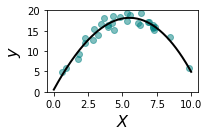

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_plot, y_plot, 'k', lw=2)

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_ylim(0, 20)

fig.set_size_inches(3, 2)
fig.tight_layout()

Awesome!
We now have a polynomial model... but it is annoying to use because we have to run two steps.

### 1.3.2 Use a pipeline to combine the transformation and learning steps
The `Pipeline` object lets you define a series of processing steps in a single model.

Create one by defining a list of tuples of the form: ('name of step', `BaseEstimator` object that does what you need).

In [ ]:
pr = Pipeline([
    ('poly', PolynomialFeatures()),
    ('lr', LinearRegression())
])

You can use the same methods to access and change parameters, but how will the pipeline know which parameters we mean to change if there are duplicates?
Within the `Pipeline`, the parameters are given new names to distinguish them, using the names we gave them when we created them.

Each parameter is prefixed by the name of the step plus two underscores.

In [ ]:
pr.set_params(poly__degree=3)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('lr', LinearRegression())])

In [ ]:
pr.get_params()

{'memory': None,
 'steps': [('poly', PolynomialFeatures(degree=3)), ('lr', LinearRegression())],
 'verbose': False,
 'poly': PolynomialFeatures(degree=3),
 'lr': LinearRegression(),
 'poly__degree': 3,
 'poly__include_bias': True,
 'poly__interaction_only': False,
 'poly__order': 'C',
 'lr__copy_X': True,
 'lr__fit_intercept': True,
 'lr__n_jobs': None,
 'lr__normalize': False,
 'lr__positive': False}

The pipeline will run the steps you defined, passing the data from one step to the next for you.
As an example, let's fit and print the outputs.
Fitting is straightforward, since all the steps have a `fit` function.

In [ ]:
pr.fit(X, y)

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('lr', LinearRegression())])

When we call the `predict` function on a `Pipeline`, only the last step will have its `predict` called.
Each of the steps before the last will have their `transform` function called, which is just what we want.

In [ ]:
y_plot = pr.predict(x_plot)

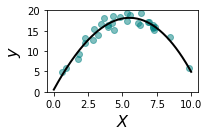

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_plot, y_plot, 'k', lw=2)

ax.set_xlabel('$X$', fontsize=16)
ax.set_ylabel('$y$', fontsize=16)
ax.set_ylim(0, 20)

fig.set_size_inches(3, 2)
fig.tight_layout()

Same procedure, cleaner format.

## 1.4 Exercise: Learning the best choice of parameters.
To test your knowledge, finish the following code for finding which parameters give you the best model.

Our first step is to split the data into a training and validation set using the `sklearn` function `train_test_split`.
Given a set of $X$ and $y$ values plus some information on how to split them, this model will partition the data into two sets of $X$ and $y$ values.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.25)
print(f'X has {X.shape[0]} points, X_train has {X_train.shape[0]}, X_valid has {X_valid.shape[0]}')

X has 32 points, X_train has 24, X_valid has 8


### 1.4.1: Task
Complete the following code to run over many different polynomial degrees to find which degree gives the most generalizable model.

In [ ]:
## fill in the missing code

results = []
for n in range(1, 10):
    # Change the polynomial degree to n


    # Fit the model using X_train


    # Evaluate MAE on X_train and X_valid





    # Add the outputs to an array for tracking them
    results.append({
        'n': n,
        'train_mae': train_mae,
        'valid_mae': valid_mae
    })

# Store the data as a Pandas DataFrame for easy analysis
results = pd.DataFrame(results)

Plot the results

In [ ]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.plot(results['n'], results['train_mae'], '--o', label='Train')
ax.plot(results['n'], results['valid_mae'], '--s', label='Validation')

ax.set_ylim(0, 6)

ax.set_xlabel('Degree')
ax.set_ylabel('MAE')
ax.legend()

Note how the training error gets continually lower as we add more terms, but the validation error starts to go up after 3 terms.
The rapid increase in error with increasing numbers of model parameters is _overfitting_.

---
# Part 2: Kernel Methods and Hyperparameter Optimization
Kernel methods are a type of machine learning that is particularly sensitive to the choice of hyperparameters (variables that control how an algorithm learns).
Here, we'll show you how to adjust them with `sklearn`'s hyperparameter-optimization tools.

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV, ShuffleSplit, train_test_split
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics import mean_absolute_error
from sklearn.kernel_ridge import KernelRidge
from sklearn.pipeline import Pipeline
from time import perf_counter
from tqdm import tqdm
import pandas as pd
import numpy as np
import os

# fix random seed
np.random.seed(12)

## 2.1 Kernel methods
The [kernel method](https://en.wikipedia.org/wiki/Kernel_method) makes a supervised-learning problem easier by creating new input features based on pairwise similarities between a new input point and each point from the training set.
The kernel creates a new set of $N$ features where each feature is the similarity between a certain entry and each of $N$ points from the training set.
The similarity function used to compute the new features is called the _kernel_.

### 2.1.1 Demo
We will first demonstrate how the kernel can drastically simplify a learning problem.

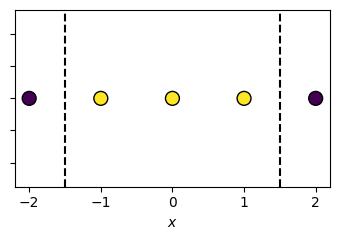

In [ ]:
x = np.arange(-2, 2.1, 1)
y = (-1 <= x) & (x <= 1)

fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.scatter(x, [0]*5, c=y, s=100, ec='k')
ax.set_ylim(ax.get_ylim())
for i in [-1.5, 1.5]:
    ax.plot([i]*2, ax.get_ylim(), 'k--')

ax.set_yticklabels([])
ax.set_xlabel('$x$')
fig.tight_layout()

Note that the classes in this problem are not linearly separable; you need 2 rules.

We apply a kernel trick to create a new set of features, using the [RBF kernel](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.pairwise.rbf_kernel.html).
The RBF kernel uses a Gaussian function to create new features

$$f_i = k(x, x_i) = \exp\left(-\gamma(x - x_i)^2)\right).$$

Applying the kernel function to all of the data yields the _kernel matrix_, where

$$ K_{ij} = k(x_i, y_j). $$

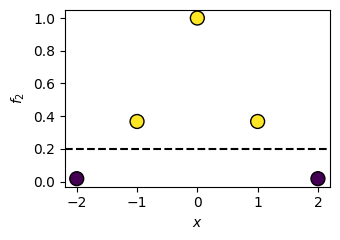

In [ ]:
f = rbf_kernel(x[:, None])
fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.scatter(x, f[:, 2], c=y, s=100, ec='k')
ax.set_xlim(ax.get_xlim())
ax.plot(ax.get_xlim(), [0.2]*2, 'k--')

ax.set_ylabel('$f_2$')
ax.set_xlabel('$x$')
fig.tight_layout()

The points are linearly separable based on one of the new features, $f_2$.
We've made the learning problem easier by transforming the data to a new space.

### 2.1.2 Kernel ridge regression
You can also use kernel methods for regression.
Kernel ridge regression (KRR) creates a model of the functional form:

$$f(x) = \sum_i c_i K(x, x_i),$$

where the sum is over all points in the training set and $x_i$ is training point $i$.

The coefficients of this equation, $c_i$, are learned by minimizing

$$\sum_i (y_i - f(x_i))^2 + \alpha \left\Vert\mathbf{c}\right\Vert^2,$$

which is the sum of the squared error of the training data and the sum of the squares of the weights;
$\alpha$ controls the tradeoff between minimizing model error and model complexity (larger weights lead to a more complex model).

This equation has a convenient [analytic solution](https://en.wikipedia.org/wiki/Tikhonov_regularization)
based on the fact it involves solving a system of linear equations.
The costly step in that equation is a matrix inversion, which can be solved efficiently using [Cholesky decomposition](https://en.wikipedia.org/wiki/Cholesky_decomposition), a convenience due to symmetries of the kernel function.

### 2.1.3 Building a KRR model using `sklearn`
We will use the [`KernelRidge`](https://scikit-learn.org/stable/modules/generated/sklearn.kernel_ridge.KernelRidge.html) method built into `sklearn` to explain how to use KRR.

We will choose the RBF kernel introduced above for our example, since it is particularly good at fitting nonlinear functions, and is also very sensitive to hyperparameter choice.

In [ ]:
krr = KernelRidge(kernel='rbf')
krr.get_params()

{'alpha': 1,
 'coef0': 1,
 'degree': 3,
 'gamma': None,
 'kernel': 'rbf',
 'kernel_params': None}

The two parameters we are interested in fitting are
1. `gamma`: Controls the width of the kernel functions (see $\gamma$ in the RBF equation)
1. `alpha`: Controls complexity (see $\alpha$ in the KRR equation)

In [ ]:
n_points = 8
X = np.random.uniform(0, 10, (n_points, 1))  # 2D array with one column
y = -0.6 * X * (X - 11) + np.random.normal(size=(n_points, 1))

To illustrate the importance of hyperparameters, let's show how the model predictions change as a function of the kernel width.

Text(0, 0.5, '$y$')

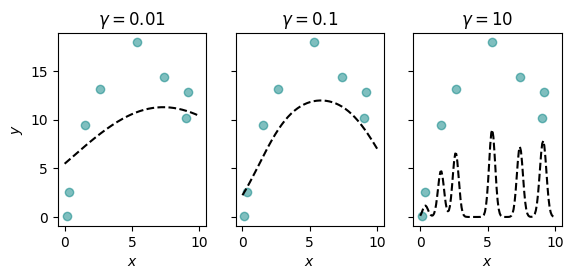

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(6.5, 2.5), sharey=True)

x_plot = np.linspace(0, 10, 128)[:, None]
for ax, g in zip(axs, [0.01, 0.1, 10]):
    # Adjust parameter, fit and run model
    krr.set_params(gamma=g)
    krr.fit(X, y)
    y_plot = krr.predict(x_plot)

    ax.scatter(X, y, color='teal', alpha=0.5)
    ax.plot(x_plot, y_plot, 'k--')

    ax.set_title(f'$\gamma = {g}$')
    ax.set_xlabel('$x$')
axs[0].set_ylabel('$y$')

Note how larger values of `gamma` give sharper models.
We can see a different effect from changing `alpha`.

Text(0, 0.5, '$y$')

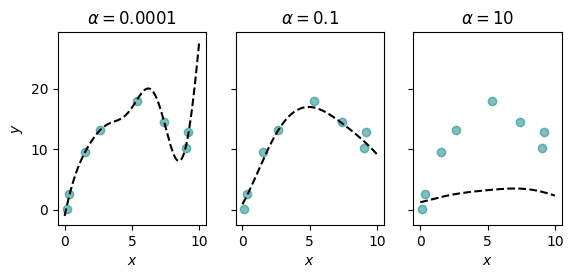

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(6.5, 2.5), sharey=True)

krr.set_params(gamma=0.1)
for ax, a in zip(axs, [0.0001, 0.1, 10]):
    # Adjust parameter, fit and run model
    krr.set_params(alpha=a)
    krr.fit(X, y)
    y_plot = krr.predict(x_plot)

    ax.scatter(X, y, color='teal', alpha=0.5)
    ax.plot(x_plot, y_plot, 'k--')

    ax.set_title(f'$\\alpha = {a}$')
    ax.set_xlabel('$x$')
axs[0].set_ylabel('$y$')

`alpha` controls how closely the model fits the training set.

## 2.2 Fitting hyperparameters
Our challenge with using KRR is to find the right mix of parameters for each problem.

### 2.2.1 Using `GridSearchCV` to optimize hyperparameters
Scikit-Learn provides a convenient tool, [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), for optimizing hyperparameters.

It works by wrapping your model inside of class that tests many variations of your model using a set of parameters you define.

You must provide `GridSearchCV` with:
1. A basic model with all the settings you do not want to change
1. A grid of parameters you want to try out (all will be evaluated)
1. A scheme to define how to score the model

In [ ]:
gs = GridSearchCV(
    estimator=KernelRidge(gamma=0.1, kernel='rbf'), # Set the estimator to be KRR
    param_grid={'alpha': np.logspace(-5, 2, 32)},  # The range
    cv=ShuffleSplit(n_splits=10,test_size=0.25, random_state=1),  # Use 10, 75/25% splits
    scoring='neg_mean_absolute_error',  # Score based on MAE
)

Once defined, `GridSearchCV` works just like any other machine-learning model in `sklearn`.

In [ ]:
%%time
gs.fit(X, y)

CPU times: user 920 ms, sys: 3.97 ms, total: 924 ms
Wall time: 948 ms


GridSearchCV(cv=ShuffleSplit(n_splits=10, random_state=1, test_size=0.25, train_size=None),
             estimator=KernelRidge(gamma=0.1, kernel='rbf'),
             param_grid={'alpha': array([1.00000000e-05, 1.68192432e-05, 2.82886943e-05, 4.75794431e-05,
       8.00250228e-05, 1.34596032e-04, 2.26380341e-04, 3.80754602e-04,
       6.40400427e-04, 1.07710506e-03, 1.81160919e-03, 3.04698957e-03,
       5.12480588e-03, 8.61953566e-03, 1.44974067e-02, 2.43835410e-02,
       4.10112707e-02, 6.89778538e-02, 1.16015530e-01, 1.95129342e-01,
       3.28192787e-01, 5.51995432e-01, 9.28414545e-01, 1.56152301e+00,
       2.62636353e+00, 4.41734470e+00, 7.42963951e+00, 1.24960914e+01,
       2.10174801e+01, 3.53498111e+01, 5.94557071e+01, 1.00000000e+02])},
             scoring='neg_mean_absolute_error')

One of its outputs contains the scores of the many models we tried.

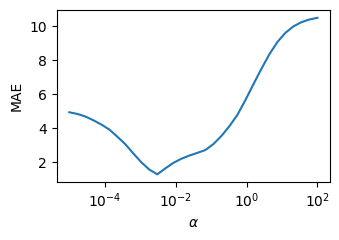

In [ ]:
fig, ax = plt.subplots(figsize=(3.5, 2.5))

ax.semilogx(np.array(gs.cv_results_['param_alpha']), -1*gs.cv_results_['mean_test_score'])

ax.set_xlabel('$\\alpha$')
ax.set_ylabel('MAE')
fig.tight_layout()

We find the best value for `alpha` is about 0.003. (Maybe different in your notebook, depending on the random seed.)

In [ ]:
gs.best_params_

{'alpha': 0.003046989570903508}

### 2.2.2: Task
Fit the model changing `alpha` using the ranges we used in the last example but with only 16 steps and `gamma` using a logarithmic space between $10^{-4}$ and $10^1$ in 16 steps

In [ ]:
### your code here

Once you have the GridSearch model fit, you can use it like any other.

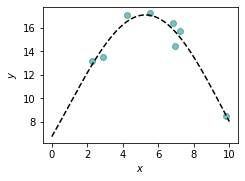

In [ ]:
fig, ax = plt.subplots(figsize=(3.5, 2.5), sharey=True)
# Run model with `.predict`
y_plot = gs.predict(x_plot)

ax.scatter(X, y, color='teal', alpha=0.5)
ax.plot(x_plot, y_plot, 'k--')

ax.set_xlabel('$x$')
ax.set_ylabel('$y$');
